In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_excel(r"\Users\lenovo\Documents\Analizy excel\Alior.xlsx","Balance")
time = df['time'] ; year = ('2015','2016','2017','2018','2019','2020')

In [11]:
class Balance:
    def __init__(self , time):
        self.time = time
        self.year = year
        self.shares = df['shares']
        self.revenue = df['sell revenue']
        self.net_profit = df['net profit']
        self.Last4_revenue = [ np.sum(self.revenue[i-4:i]) for i in range(4,len(self.shares)+1) ]
        self.Last4_profit = [ np.sum(self.net_profit[i-4:i]) for i in range(4,len(self.shares)+1) ]
        self.Revenue_year = [ np.sum(self.revenue[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Gross_profit = df['Gross_profit']
        
        self.Equity = df['Equity']
        self.cash = df['Cash']
        self.Assets_total = df['Assets']
        self.Financial_assets = df['Financial_assets']
        self.Assets_year_mean = [ np.mean(self.Assets_total[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Invested_capital = self.Assets_total-self.cash-self.Equity
        
        self.Operating_flow = df['Operating_flow']
        self.Amortization = df['Amortization']
        self.Investment_flow = df['Investment_flow']
        self.CAPEX = df['CAPEX']
        self.Financial_flow = df['Financial_flow']
        
        self.ROE = self.Last4_profit/self.Equity[3:len(self.Equity)] 
        self.beta = self.Equity[3:len(self.Equity)]/self.Last4_revenue
        self.Assets_productivity = [ self.Revenue_year[i]/self.Assets_year_mean[i]*100 for i in range(0,len(self.Revenue_year))]
        self.ROIC = self.Gross_profit/self.Invested_capital
        
        
    def equity(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(311)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time, self.Equity/self.shares*1000, 
                label='equity/share ='"$"+str(round(self.Equity[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        plt.plot(self.time, self.cash/self.shares*1000 , color='green', linewidth = 3, 
                 label='cash/share ='"$"+str(round(self.cash[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.legend(loc='best' , fontsize = 12 )
        self.ax = plt.subplot(312)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time[3:len(self.shares)], self.ROE*100, color='darkgreen')
        self.ax.set_title('ROE')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        self.ax = plt.subplot(313)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.plot(self.time[3:len(self.shares)], self.beta[3:len(self.shares)]*self.ROE*100 )
        self.ax.set_title('ROE*BETA')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        
        self.fig = plt.figure(figsize = (20,8) , dpi=80)
        self.ax = plt.subplot()
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2=self.ax.twinx()
        self.ax.bar(self.time, self.Invested_capital/self.shares*1000, color='darkorange')
        self.ax2.plot(self.time, self.ROIC*100, label='ROIC='"$"+str(round(self.ROIC[len(self.ROIC)-1],3))+"$"
                      ,color='crimson',linestyle='--',marker='o')
        plt.legend(loc='best')
        
    def Assets(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Assets' , fontsize = 20)
        plt.bar(self.time, self.Assets_total/self.shares*1000)
        plt.plot(self.time, self.Financial_assets/self.shares*1000, color='firebrick')
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.year , self.Assets_productivity, label='Assets productivity = revenue/assets')
        plt.legend(loc='best')
        
        
    def Flow(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Flow' , fontsize=20)
        self.ax.plot(self.time, self.Amortization/(self.Assets_total-self.Financial_assets)*100, label='Amortization/Noncurrent assets')
        plt.legend(loc='best')
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.scatter(self.time, (self.Operating_flow-self.CAPEX)/self.shares*1000, color='lime')
        
        
        

None

None

None

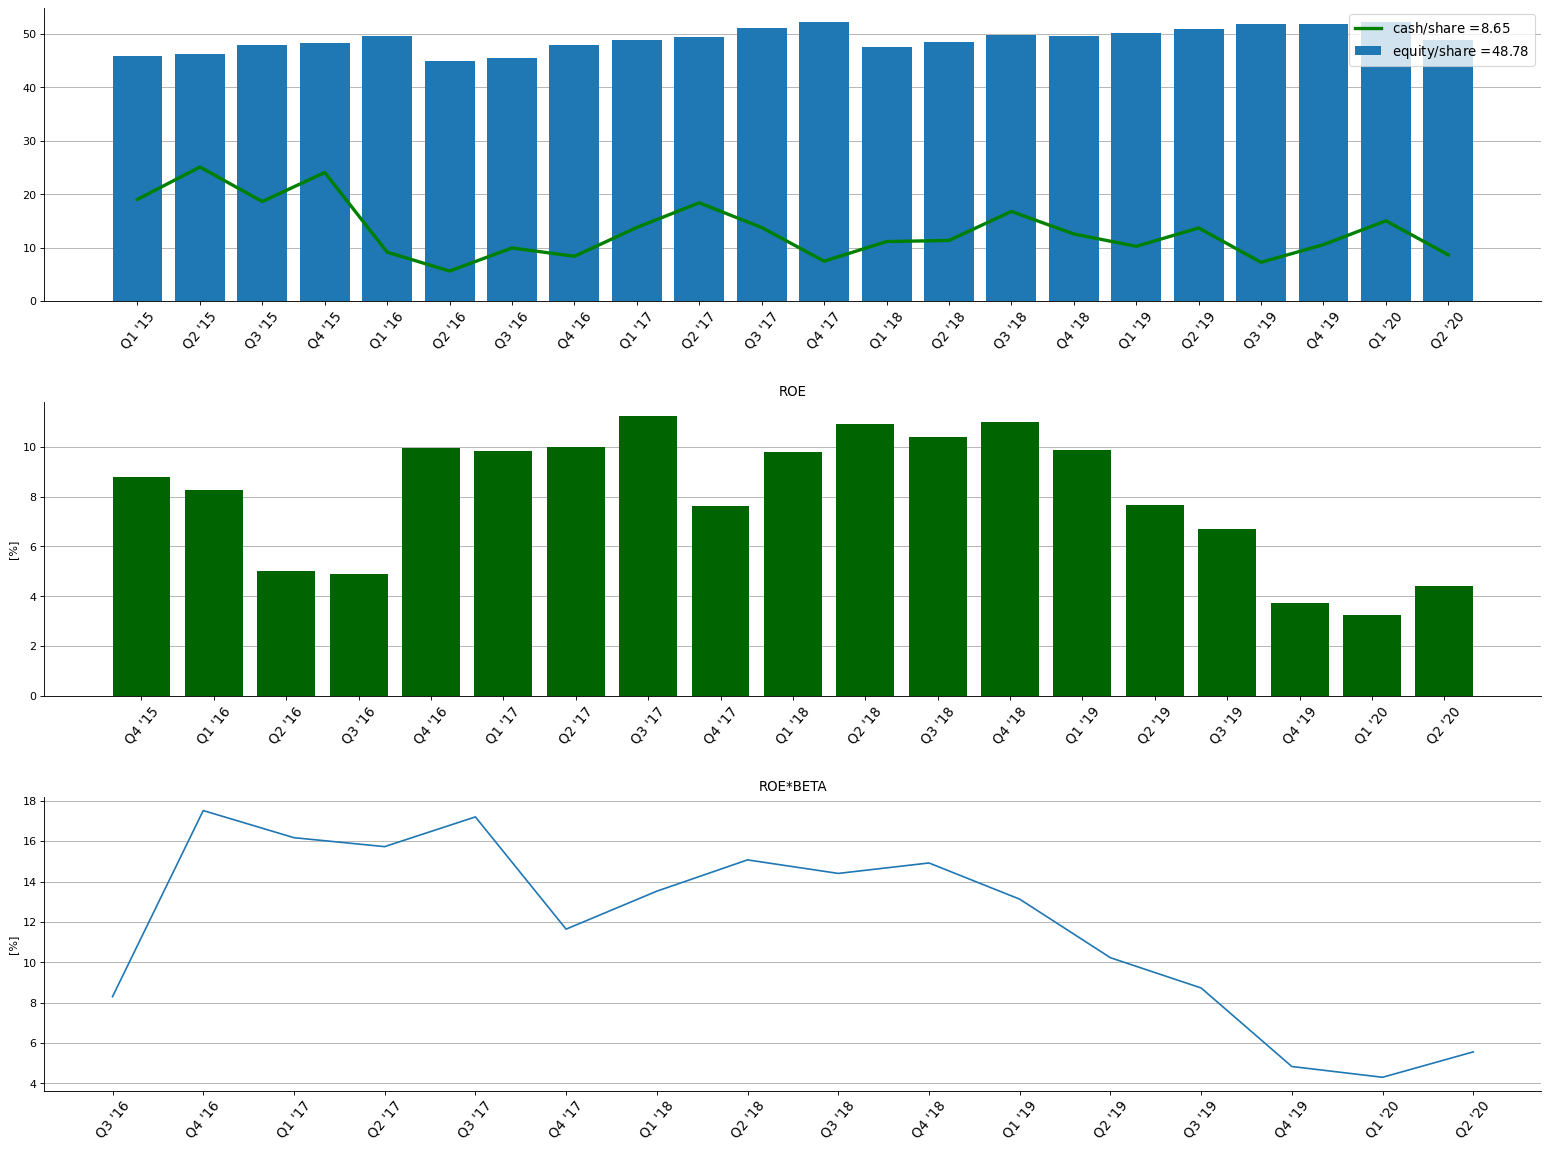

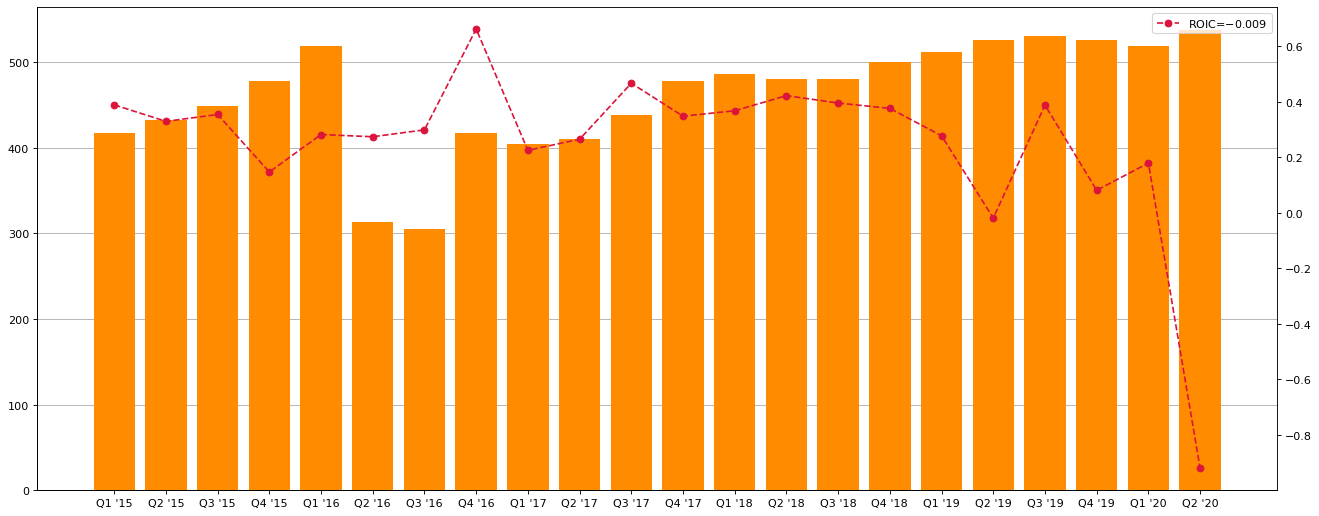

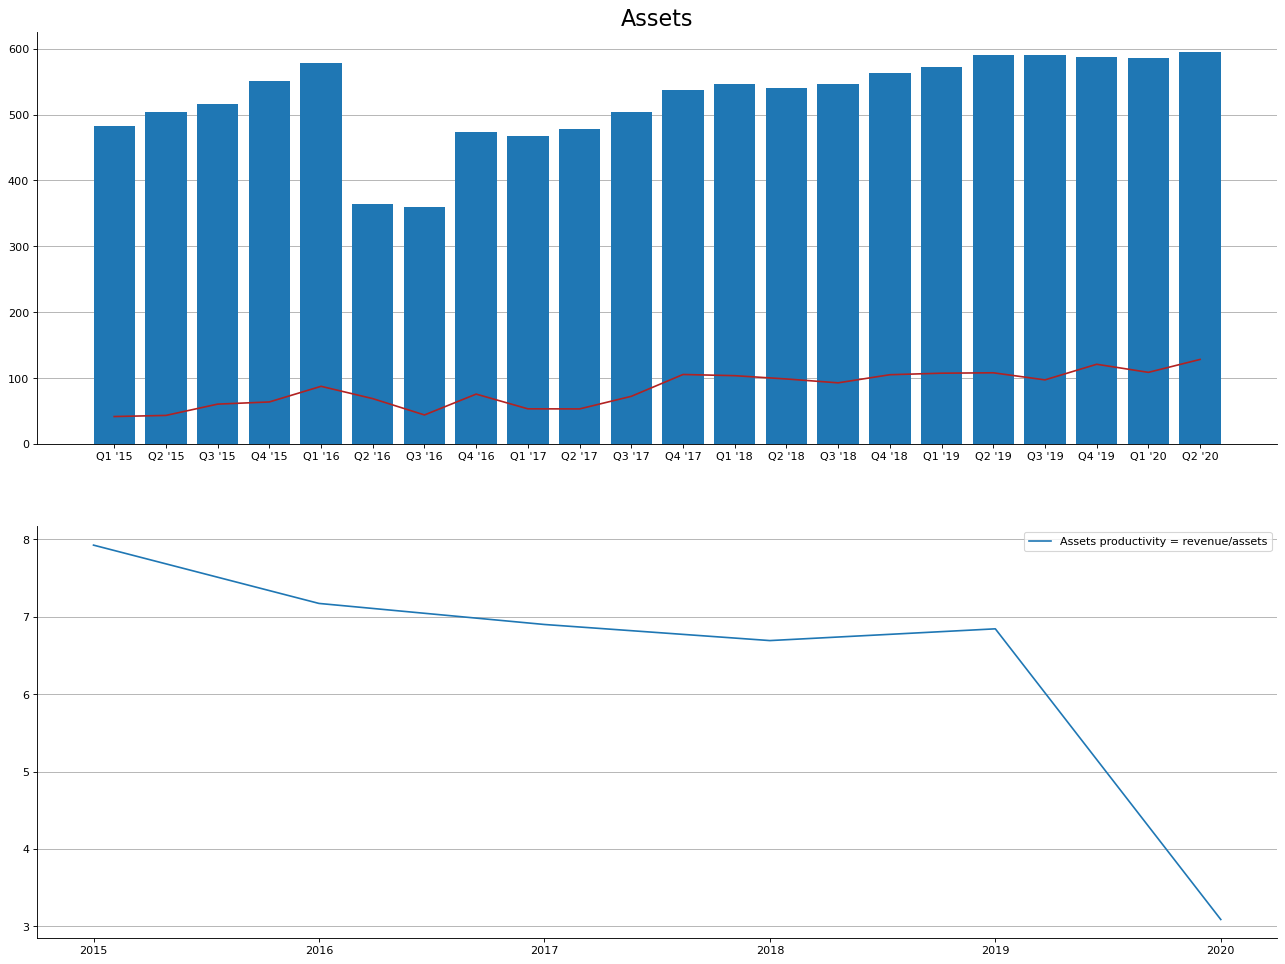

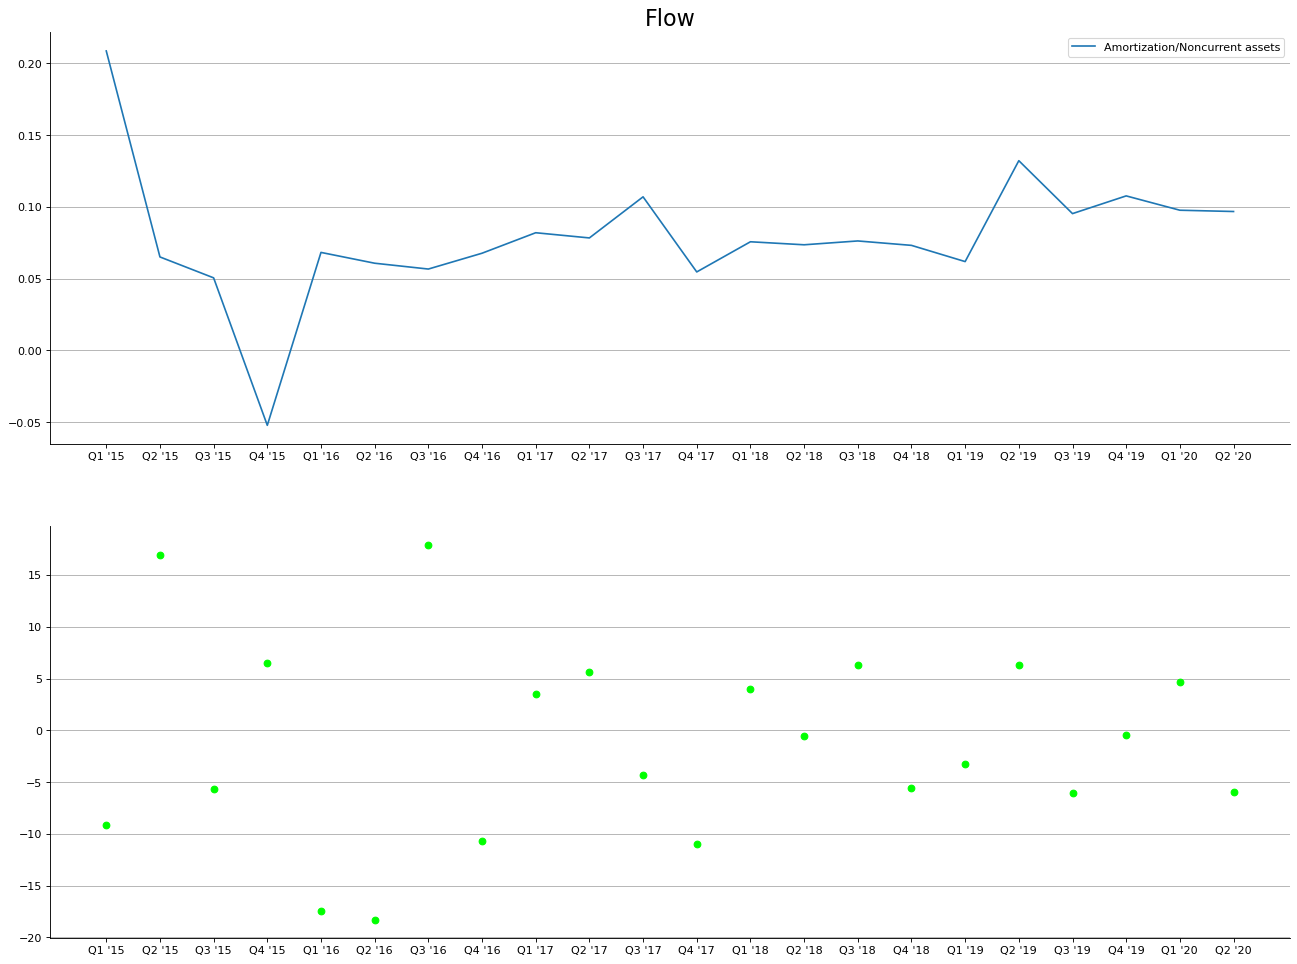

In [12]:
fin = Balance(time)
display(fin.equity())
display(fin.Assets())
display(fin.Flow())